In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_excel("Data/tr.xlsx")

In [2]:
over_missing_sample = []
row_value_count = train_data.apply(pd.Series.value_counts,axis=1,dropna=False)

In [58]:
import tools
#Data transform
train_y = pd.DataFrame(train_data['outcome']) 
train_X = pd.DataFrame(train_data.drop(['outcome'],axis=1))

train_X = tools.data_transform(train_X)

In [59]:
threshhold = 23
over_missing = row_value_count[np.nan]<=threshhold
class_0 = train_y['outcome']==1

print(sorted(train_y.value_counts()))
train_X = train_X[over_missing|class_0]
train_y = train_y[over_missing|class_0]
print(sorted(train_y.value_counts()))


[879, 51280]
[879, 50783]


In [60]:
# Data split
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(
    train_X ,
    train_y,
    test_size=0.2,
    random_state=42)

print(sorted(train_y.value_counts()))
print(sorted(val_y.value_counts()))

[696, 40633]
[183, 10150]


In [61]:
from imblearn.under_sampling import RandomUnderSampler as RUS

print(sorted(train_y.value_counts()))

rus = RUS(sampling_strategy=0.1,random_state=42)
train_X,train_y = rus.fit_resample(train_X,train_y)

print(sorted(train_y.value_counts()))

[696, 40633]
[696, 6960]


In [62]:
# Missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import tools
feature_kind = tools.init_feature_kind(train_X)
cont,cate = tools.get_feature_kind(train_X,feature_kind)  

strategy = 'median'

imp_mean = IterativeImputer(max_iter=50,random_state=0)
imp_mean.fit(train_X[cont])

train_X[cont] = imp_mean.transform(train_X[cont])
val_X[cont] = imp_mean.transform(val_X[cont])

print("filled continuous missing value with "+strategy)

strategy = 'constant'

imp = SimpleImputer(missing_values=np.nan, strategy=strategy,fill_value=10.0)
imp.fit(train_X[cate])

train_X[cate] = imp.transform(train_X[cate])
val_X[cate] = imp.transform(val_X[cate])


print("filled nominal missing value with ",strategy)


filled continuous missing value with median
filled nominal missing value with  constant


In [63]:
from sklearn import preprocessing


cont,cate = tools.get_feature_kind(train_X,feature_kind)

scaler = preprocessing.StandardScaler().fit(train_X[cont])
train_X[cont] = scaler.transform(train_X[cont])
val_X[cont] = scaler.transform(val_X[cont])

In [64]:
'''import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(train_X, train_y)
importance = np.abs(ridge.coef_)
feature_names = np.array(train_X.columns)
plt.bar(height=importance[0], x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()


train_X=train_X[feature_names[importance[0]>0.004]]
val_X = val_X[feature_names[importance[0]>0.004]]
print(train_X.shape)'''

'import matplotlib.pyplot as plt\nimport numpy as np\nfrom sklearn.linear_model import RidgeCV\n\nridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(train_X, train_y)\nimportance = np.abs(ridge.coef_)\nfeature_names = np.array(train_X.columns)\nplt.bar(height=importance[0], x=feature_names)\nplt.title("Feature importances via coefficients")\nplt.show()\n\n\ntrain_X=train_X[feature_names[importance[0]>0.004]]\nval_X = val_X[feature_names[importance[0]>0.004]]\nprint(train_X.shape)'

In [65]:
#train_X,val_X,_=tools.drop_predominant_feature(0.975,train_X,val_X)

In [66]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#用RFE,返回特徵選擇後的資料
#參數estimator裡放機器學習模型
#參數n_feature_to_select為要選擇的特徵個數
clf = LogisticRegression(class_weight={1:1,0:0.1},solver='liblinear')

record = tools.wrapper_approach(clf,train_X,train_y,val_X,val_y)

1
train
val



2
train
val



3
train
val



4
train
val



5
train
val



6
train
val



7
train
val



8
train
val



9
train
val



10
train
val



11
train
val



12
train
val



13
train
val



14
train
val



15
train
val



16
train
val



17
train
val



18
train
val



19
train
val



20
train
val



21
train
val



22
train
val



23
train
val



24
train
val



25
train
val



26
train
val



27
train
val



28
train
val



29
train
val



30
train
val



31
train
val



32
train
val



33
train
val



34
train
val



35
train
val



36
train
val



37
train
val



38
train
val



39
train
val



40
train
val



41
train
val



42
train
val



43
train
val



44
train
val



45
train
val



46
train
val



47
train
val



48
train
val



49
train
val



50
train
val



51
train
val



52
train
val



53
train
val



54
train
val



55
train
val



56
train
val



57
train
val



58
train
val



59
train
val



60
train
val



61
train
val



62
train
val



63
train
val



6

In [67]:
def set_pandas_display_options() -> None:
    display = pd.options.display
    display.max_columns = 100
    display.max_rows = 100
    display.max_colwidth = 199
    display.width = None
set_pandas_display_options()

             confusion matrix       acc precision  f1_score    recall  \
1     [[9989, 161], [179, 4]]  0.967096  0.024242  0.022989  0.021858   
2     [[9928, 222], [179, 4]]  0.961192  0.017699   0.01956  0.021858   
3    [[9541, 609], [164, 19]]  0.925191  0.030255  0.046856  0.103825   
4    [[9448, 702], [159, 24]]  0.916675  0.033058  0.052805  0.131148   
5   [[2423, 7727], [25, 158]]  0.249782  0.020038  0.039167  0.863388   
6   [[2423, 7727], [25, 158]]  0.249782  0.020038  0.039167  0.863388   
7    [[7223, 2927], [98, 85]]  0.707249   0.02822  0.053208  0.464481   
8    [[7227, 2923], [98, 85]]  0.707636  0.028258  0.053275  0.464481   
9    [[6998, 3152], [89, 94]]  0.686345  0.028959  0.054826  0.513661   
10   [[7004, 3146], [89, 94]]  0.686925  0.029012  0.054923  0.513661   
11   [[7035, 3115], [87, 96]]  0.690119  0.029897   0.05657   0.52459   
12   [[7042, 3108], [87, 96]]  0.690796  0.029963  0.056687   0.52459   
13  [[6787, 3363], [80, 103]]  0.666796  0.029717  

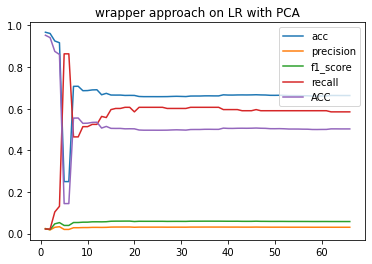

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
#print(record)
df = pd.DataFrame(record).T
#print(df)
df.plot.line()
plt.title('wrapper approach on LR with PCA')
print(pd.DataFrame(record).T)

In [69]:
from sklearn.feature_selection import RFE
clf = LogisticRegression(class_weight={1:1,0:0.1},solver='liblinear') 

rfe = RFE(estimator=clf,n_features_to_select=24)

train_wrapper_X = rfe.fit_transform(train_X,train_y['outcome'])
val_wrapper_X = rfe.transform(val_X)



clf.fit(train_wrapper_X, train_y['outcome'])
result = clf.predict(val_wrapper_X)

print("train")
print(pd.DataFrame({
    'train':tools.get_performance(train_y,clf.predict(train_wrapper_X)),
    'val':tools.get_performance(val_y,result)
    }
    ))




train
                                       train                        val
confusion matrix  [[4686, 2274], [276, 420]]  [[6686, 3464], [72, 111]]
acc                                 0.666928                   0.657795
precision                           0.155902                   0.031049
f1_score                            0.247788                   0.059074
recall                              0.603448                   0.606557
ACC                                 0.536909                   0.496639
